# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})
    
    

### Przykład użycia

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
# plot.draw()

### Rozwiązanie

<IPython.core.display.Javascript object>


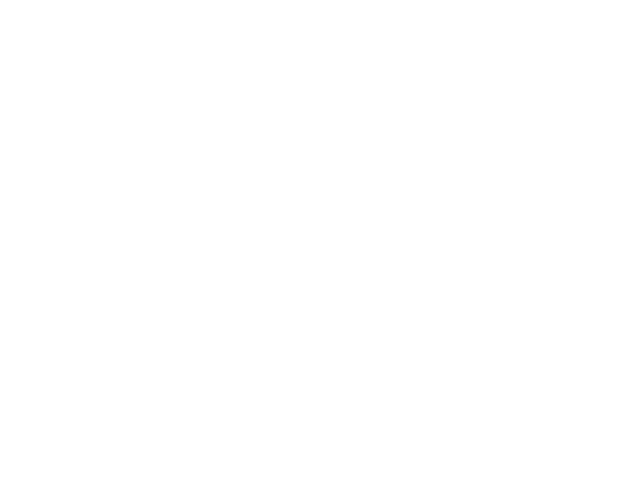

In [4]:
%matplotlib notebook
import random
import math
def genPoints(l, r, n):
    points = []
    for x in range(n):
        points.append((random.randint(l,r), random.randint(l,r)))
    Plot([PointsCollection(points)]).draw()
    
genPoints(-10**14, 10**14, 10)

In [5]:
%matplotlib notebook
import random
import math
def genPoints(R, n):
    points = []
    for x in range(n):
        p = random.uniform(0,2 * math.pi)
        points.append((math.sin(p) * R, math.cos(p) * R))
    Plot([PointsCollection(points)]).draw()
    
# genPoints(100,1000)

In [6]:
%matplotlib notebook
import random
import math
def genPoints(n):
    points = []
    for x in range(n):
        t = random.uniform(-499.5, 500.5)
        points.append((-1.0+t*2.0,1.0+t*0.1))
    Plot([PointsCollection(points)]).draw()
    
# genPoints(1000)

Wyznacznik (2) jest dokładniejszy
-108
496758
498151
5091
496779
498238
4983


<IPython.core.display.Javascript object>


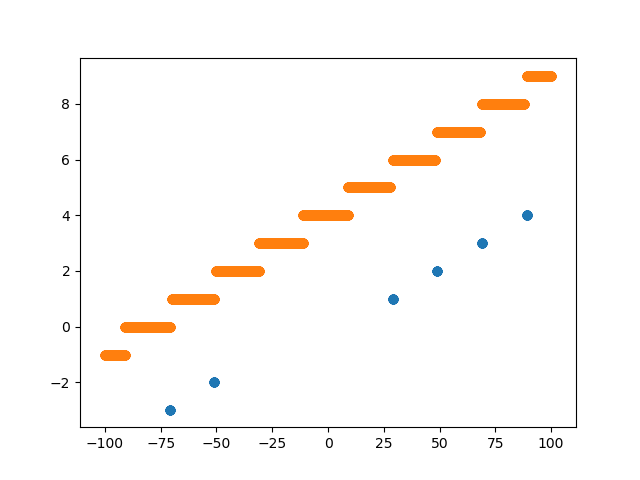

In [8]:
%matplotlib notebook

import random
import math

ax = -1.0
ay = 0.0
bx = 1.0
by = 0.1

def wyznacznik1(ax, ay, bx, by, cx, cy):
    wyz1 = (ax * by * 1) + (bx * cy * 1) + (cx * ay * 1)
    wyz2 = (1 * by * cx) + (1 * cy * ax) + (1 * ay * bx)
    wyz = wyz1 - wyz2
    return wyz

def wyznacznik2(ax, ay, bx, by, cx, cy):
    return (((ax - cx) * (by - cy)) - ((ay - cy) * (bx - cx)))

def genColoredPoints(l, r, n):
    pointsAboveWyz1 = []
    pointsBelowWyz1 = []
    pointsEqualWyz1 = []
    
    pointsAboveWyz2 = []
    pointsBelowWyz2 = []
    pointsEqualWyz2 = []
    
    movedPointsEqualWyz1 = []
    
    for x in range(n):
        X = random.randint(l,r)
        Y = random.randint(l,r)
        
        wyz1 = wyznacznik1(ax, ay, bx, by, X, Y)
        wyz2 = wyznacznik2(ax, ay, bx, by, X, Y)
        point = (X, Y)
        
#         For graphic difference in point divisin
        movedPoint = (X, Y + 4)
        
        if wyz1 > 1.0:
            pointsAboveWyz1.append(point)
        elif wyz1 < -1.0:
            pointsBelowWyz1.append(point)
        else:
            pointsEqualWyz1.append(point)
            movedPointsEqualWyz1.append(movedPoint)
            
        if wyz2 > 1.0:
            pointsAboveWyz2.append(point)
        elif wyz2 < -1.0:
            pointsBelowWyz2.append(point)
        else:
            pointsEqualWyz2.append(point)
            
    difference = len(pointsEqualWyz1) - len(pointsEqualWyz2)
    
#     Liczenie różnicy dokładności
    if difference > 0:
        print("Wyznacznik (1) jest dokładniejszy")
    elif difference < 0:
        print("Wyznacznik (2) jest dokładniejszy")
    else:
        print("What the hell?!")
        
    print(difference)
    print(len(pointsAboveWyz2))
    print(len(pointsBelowWyz2))
    print(len(pointsEqualWyz2))
    
    print(len(pointsAboveWyz1))
    print(len(pointsBelowWyz1))
    print(len(pointsEqualWyz1))
    
    pointsEqualWyz1.sort()
    pointsEqualWyz2.sort()
            
#     Plotowanie dla punktów liczonych wyznacznikiem (1)    
#     Plot([PointsCollection(pointsAboveWyz1, color = 'red'), 
#           PointsCollection(pointsBelowWyz1, color = 'blue'), 
#           PointsCollection(pointsEqualWyz1, color = 'green')]).draw()
    
#     Plotowanie dla punktów liczonych wyznacznikiem (2)
#     Plot([PointsCollection(pointsAboveWyz2, color = 'red'), 
#           PointsCollection(pointsBelowWyz2, color = 'blue'), 
#           PointsCollection(pointsEqualWyz2, color = 'green')]).draw()

# 
    i = 0
    j = 0
    graphicPoints = []
    for x in range(len(pointsEqualWyz2)):
        if pointsEqualWyz2[x] in pointsEqualWyz1:
            i = i + 1
        else:
            graphicPoints.append(pointsEqualWyz2[x])
            j = j + 1
            
    Plot([PointsCollection(graphicPoints), 
          PointsCollection(movedPointsEqualWyz1)]).draw()
    
genColoredPoints(-10**2,10**2,10**6)